In [105]:
import matplotlib.pyplot as plt
import numpy as np
from math import pow
from numpy.linalg import inv
#if using a Jupyter notebook, include:
%matplotlib inline

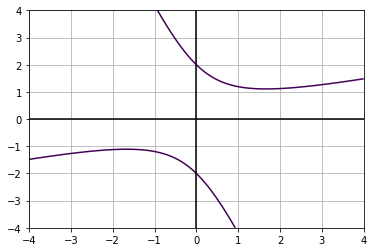

In [71]:
## 2-D plot
fig, ax = plt.subplots()
t = 4
# N = len(np.arange(-t,t, 0.01))
y, x = np.ogrid[-t:t:100j, -t:t:100j]
plt.contour(x.ravel(), y.ravel(), x**2 -y**2 + 4 -3*x*y, [0])
plt.grid()
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.show()

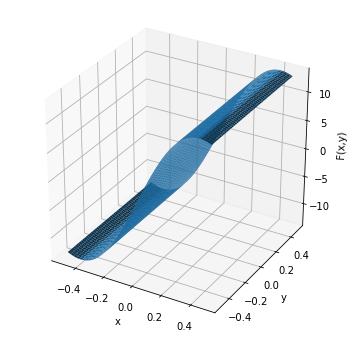

In [70]:
# 3-D plot
t = 0.5
step = 0.01
x = np.arange(-t,t,step)
y = np.arange(-t,t,step)
X,Y = np.meshgrid(x,y)
Z = X*np.exp(x**2 -y**2 + 4 -3*x*y)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# Plot a 3D surface
ax.plot_surface(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('F(x,y)')
plt.show()


J(x, y): (-2.500000, 0.500000)
J(x, y): (-1.750000, 0.350000)
J(x, y): (-1.225000, 0.245000)
J(x, y): (-0.857500, 0.171500)
J(x, y): (-0.600250, 0.120050)
J(x, y): (-0.420175, 0.084035)
J(x, y): (-0.294122, 0.058825)
J(x, y): (-0.205886, 0.041177)
J(x, y): (-0.144120, 0.028824)
J(x, y): (-0.100884, 0.020177)
J(x, y): (-0.070619, 0.014124)
J(x, y): (-0.049433, 0.009887)
J(x, y): (-0.034603, 0.006921)
J(x, y): (-0.024222, 0.004844)
J(x, y): (-0.016956, 0.003391)
J(x, y): (-0.011869, 0.002374)
J(x, y): (-0.008308, 0.001662)
J(x, y): (-0.005816, 0.001163)
J(x, y): (-0.004071, 0.000814)
J(x, y): (-0.002850, 0.000570)
J(x, y): (-0.001995, 0.000399)
J(x, y): (-0.001396, 0.000279)
J(x, y): (-0.000977, 0.000195)
J(x, y): (-0.000684, 0.000137)
J(x, y): (-0.000479, 0.000096)
J(x, y): (-0.000335, 0.000067)
J(x, y): (-0.000235, 0.000047)
J(x, y): (-0.000164, 0.000033)
J(x, y): (-0.000115, 0.000023)
J(x, y): (-0.000080, 0.000016)
J(x, y): (-0.000056, 0.000011)
J(x, y): (-0.000039, 0.000008)
J(x, y):

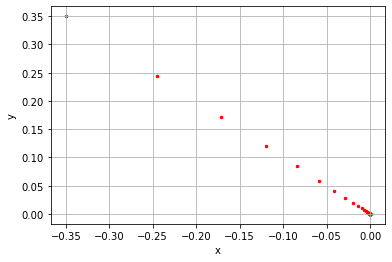

In [221]:
def f(x, y): 
    return x**2 - y**2 + 4 - 3*x*y

def delta(x, y): 
    delta = np.array([[2*x -3*y], [-2*y - 3*x]])
#     print("delta: ",delta)
    return delta

def hessian_inv(x, y): 
    H = np.matrix([[2, -3], [-3, -2]])
    H_inv = inv(H)
#     print("H_inv: ",H_inv)
    return H_inv

x = -0.5
y = 0.5
np.set_printoptions(precision=2)

#Learning rate 
alpha=0.3

for i in range(0, 50): 
    J = delta(x,y)
    print ( "J(x, y): (%.6f, %.6f)"%(J[0,0], J[1,0]))
    init = np.asarray([x, y]).reshape(2,1)
    vec =  init - alpha * np.dot(hessian_inv(x,y), J)
    x = vec[0,0]
    y = vec[1,0]
    plt.scatter(x,y, color = 'r', s=6)
    
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [222]:
# def f( x ): 
#     return x*x+x*x*x+pow(x, 4) 

# def fp( x ): 
#     return 2*x+3*x*x+4*pow(x, 3) 

# def fpp( x ): 
#     return 2+6*x+12*pow(x, 2) 

# # Initial point 
# x=5.6
# #Learning rate 
# alpha=1

# for i in range(0, 30): 
#     print ( "x: ", x, " f(x): ", f(x), " J(x): ", fp(x)) 
#     x = x - alpha * fp(x)/fpp(x) 